size of the image: (105, 70) colour mode: RGB
size of the image: (105, 70) colour mode: RGB


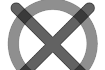

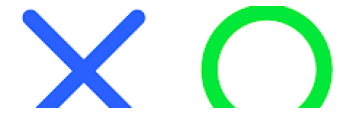

In [1]:
from PIL import Image,ImageChops,ImageFilter
from matplotlib import pyplot as plt
#Create a PIL image object
x=Image.open("x.png")
o=Image.open("o.png")
#Find out the attribute of image objects
print('size of the image:',x.size,'colour mode:',x.mode)
print('size of the image:',o.size,'colour mode:',o.mode)
#plot 2 images one beside the other
plt.subplot(121),plt.imshow(x)
plt.axis('off')
plt.subplot(122),plt.imshow(o)
plt.axis('off')
#multiply the images
merged=ImageChops.multiply(x,o)
#adding 2 images
add=ImageChops.add(x,o)
#convert colour mode
greyscale=merged.convert('L')
greyscale

In [4]:
#more attribute
image=merged
print('image size:',image.size,
       '\ncolor mode:',image.mode,
       '\nimage width:',image.width,'---also represented by:',image.size[0],
       '\nimage height:',image.height,'---also represented by:',image.size[1],)

image size: (105, 70) 
color mode: RGB 
image width: 105 ---also represented by: 105 
image height: 70 ---also represented by: 70


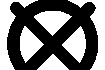

In [5]:
#mapping the pixel of the images so we can use them as coordinates 
pixel=greyscale.load()
#a nested loop to parse through all the pixel in the image
for row in range(greyscale.size[0]):
    for column in range(greyscale.size[1]):
        if pixel[row,column]!=(255):
            pixel[row,column]=(0)
            
greyscale


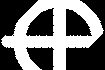

In [6]:
#invert images
invert=ImageChops.invert(greyscale)
#invert by subtraction
bg=Image.new('L',(256,256),color=(255))#create an image with a solid white background
subt=ImageChops.subtract(bg,greyscale)#subtract the image from the background
#rotate
rotate=subt.rotate(45)
rotate

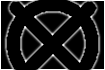

In [7]:
#gaussian blur
blur=greyscale.filter(ImageFilter.GaussianBlur(radius=1))
#edge detection
edge=blur.filter(ImageFilter.FIND_EDGES)
edge
                     


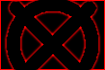

In [8]:
#change edge colours
edge=edge.convert('RGB')
bg_red=Image.new('RGB',(256,256),color=(255,0,0))
filled_edge=ImageChops.darker(bg_red,edge)
filled_edge

In [ ]:
#save image in the directory
edge.save('processed.png')